In [28]:
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

2.5.0


Download dataset

In [29]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2021-08-11 12:12:22--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.126.128, 74.125.70.128, 74.125.132.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   197MB/s    in 0.7s    

2021-08-11 12:12:23 (197 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [30]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2021-08-11 12:12:23--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.196.128, 173.194.197.128, 64.233.191.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.196.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.08s   

2021-08-11 12:12:23 (141 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



Extract data to train and validation dirs

In [31]:
zip_file = zipfile.ZipFile('/tmp/horse-or-human.zip', 'r')
zip_file.extractall('/tmp/horse-or-human')

zip_file = zipfile.ZipFile('/tmp/validation-horse-or-human.zip', 'r')
zip_file.extractall('/tmp/validation-horse-or-human')

zip_file.close()

In [32]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')
train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')
validation_horse_hames = os.listdir(validation_horse_dir)
validation_human_names = os.listdir(validation_human_dir)

Data preprocessing and visualization

In [33]:
print('Training horse images:', len(os.listdir(train_horse_dir)))
print('Training human images:', len(os.listdir(train_human_dir)))
print('Validation horse images:', len(os.listdir(validation_horse_dir)))
print('Validation human images:', len(os.listdir(validation_human_dir)))

Training horse images: 500
Training human images: 527
Validation horse images: 128
Validation human images: 128


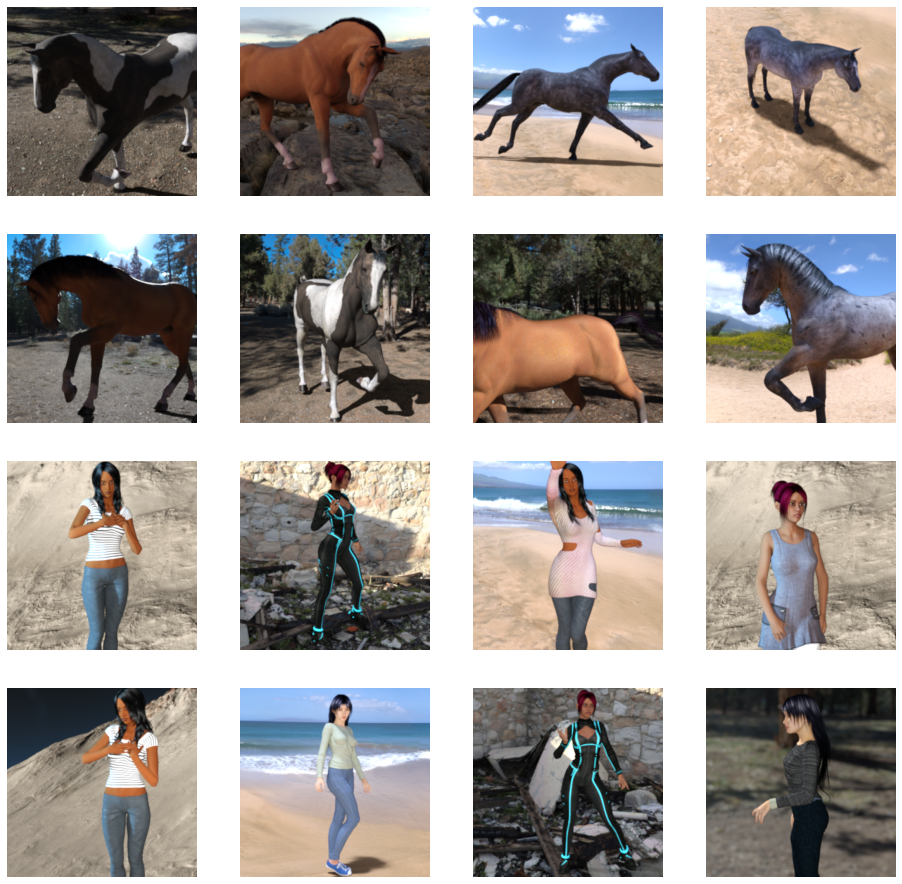

In [34]:
# Output images in a 4x4 configuration
nrows = 4
ncols = 4
pic_index = 0


fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [35]:
IMAGE_SIZE = 300

In [36]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  
        target_size=(IMAGE_SIZE, IMAGE_SIZE),  
        batch_size=128,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  
        target_size=(IMAGE_SIZE, IMAGE_SIZE),  
        batch_size=32,
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


Model

In [37]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 33, 33, 64)       

Compile

In [39]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Callback function for early stopping

In [40]:
  DESIRED_ACCURACY = 0.98
  
  class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy') > DESIRED_ACCURACY):
        print("\nReached {}% accuracy so cancelling training!".format(DESIRED_ACCURACY))
        self.model.stop_training = True
        
  callb = MyCallback()

Train

In [41]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8,
      callbacks=[callb])

Epoch 1/15
8/8 [==============================] - 86s 10s/step - loss: 0.8787 - accuracy: 0.5295 - val_loss: 0.6282 - val_accuracy: 0.6406
Epoch 2/15
8/8 [==============================] - 84s 10s/step - loss: 1.1870 - accuracy: 0.7197 - val_loss: 0.7934 - val_accuracy: 0.5234
Epoch 3/15
8/8 [==============================] - 84s 10s/step - loss: 0.4718 - accuracy: 0.8131 - val_loss: 0.5654 - val_accuracy: 0.7812
Epoch 4/15
8/8 [==============================] - 85s 10s/step - loss: 0.2840 - accuracy: 0.8821 - val_loss: 0.7477 - val_accuracy: 0.8359
Epoch 5/15
8/8 [==============================] - 85s 10s/step - loss: 0.3663 - accuracy: 0.8776 - val_loss: 1.2779 - val_accuracy: 0.7461
Epoch 6/15
8/8 [==============================] - 85s 10s/step - loss: 0.1078 - accuracy: 0.9644 - val_loss: 2.4850 - val_accuracy: 0.7656
Epoch 7/15
8/8 [==============================] - 85s 10s/step - loss: 0.4925 - accuracy: 0.8498 - val_loss: 1.2936 - val_accuracy: 0.6953
Epoch 8/15
8/8 [===========